In [420]:
import numpy as np
import pandas as pd


In [421]:
df = pd.read_csv('/content/placement (1).csv')


In [422]:
df.iloc[:,1:]


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [423]:
#0. Preprocess+ EDA+ Feature Selection
#1. Extract input and output cols
#2. Scale the values
#3. Train test split
#4. Train the model
#5. Evaluate the model/model selection
#6. Deploy the model

In [424]:
import matplotlib.pyplot as plt

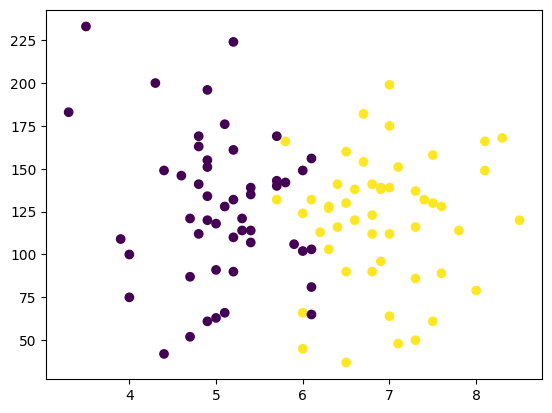

In [425]:
df['cgpa'] = df['cgpa'].astype(str).str.replace(',', '.').astype(float)
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [426]:
x = df.iloc[:,1:3]
y = df.iloc[:,-1]


In [427]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [428]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [429]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

In [430]:
from sklearn.preprocessing import StandardScaler

In [431]:
scaler = StandardScaler()

In [432]:
x_test = scaler.fit_transform(x_test)

In [433]:
x_test

array([[-1.05843659,  1.54614582],
       [-0.59824677, -0.14783864],
       [ 0.5062088 ,  0.34495684],
       [ 0.59824677,  0.03695966],
       [-1.15047455, -2.05742113],
       [ 1.70270234, -0.14783864],
       [ 1.51862641, -0.91783158],
       [ 0.04601898, -0.51743525],
       [-1.05843659,  1.36134751],
       [-0.5062088 ,  0.49895542]])

In [434]:
from sklearn.linear_model import LogisticRegression

In [435]:
clf = LogisticRegression()

#model training
clf.fit(x_train,y_train)

In [436]:
clf.fit(x_train,y_train)

LogisticRegression()

In [437]:
y_pred = clf.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [438]:
y_test

,placement
75,0
46,0
57,1
20,1
94,0
55,1
42,1
62,0
34,0
49,0


In [439]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6

In [440]:
from mlxtend.plotting import plot_decision_regions


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

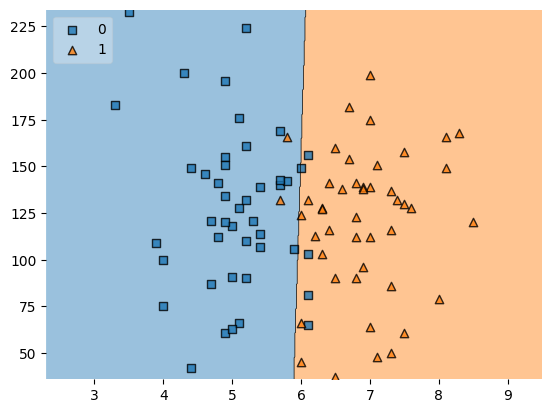

In [441]:
plot_decision_regions(x_train.values, y_train.values, clf=clf, legend=2)